# **Real-Time Web Scraping of Major Currency Exchange Rates and Classifications**

This code fetches exchange rate data for currencies from a specified URL and classifies the changes as "Increase," "Decrease," or "Neutral" based on the observed trends. It continuously updates a bar plot that visualizes these classifications, effectively tracking the sentiment of exchange rate movements over time.



In [ ]:
import pandas as pd
from datetime import date

#Define the URL
url = "https://www.xe.com/currencycharts/?from=USD&to=INR&view=1D"

#Fetch the data
dfs = pd.read_html(url)


#Assume the relevant table is the first one (index 0) based on the columns
df = dfs[0]

#Add the date column
single_date = date.today()  # Use current date
df['Date'] = single_date.strftime("%Y-%m-%d")


#Print the entire first table to manually inspect
print("Full content of the first table:")
print(df)


Full content of the first table:
    Currency        Rate Change        Date
0  EUR / USD    1.110130      ▲  2024-09-05
1  GBP / EUR    1.186600      ▼  2024-09-05
2  USD / JPY  143.496000      ▼  2024-09-05
3  GBP / USD    1.317290      ▲  2024-09-05
4  USD / CHF    0.845632      ▼  2024-09-05
5  USD / CAD    1.351700      ▼  2024-09-05
6  EUR / JPY  159.300000      ▼  2024-09-05
7  AUD / USD    0.673249      ▲  2024-09-05


In [ ]:
!pip install schedule

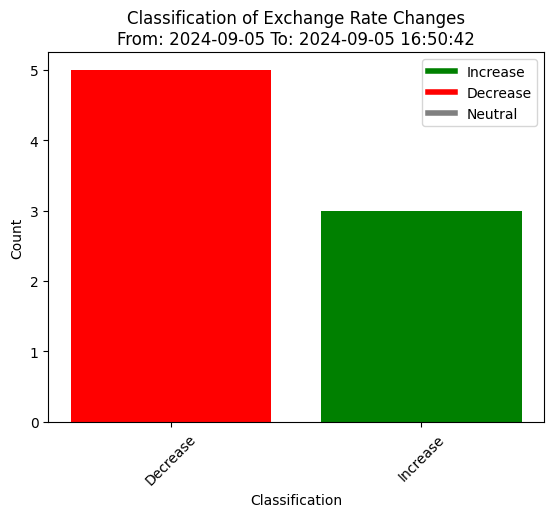


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


<Figure size 640x480 with 0 Axes>


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


<Figure size 640x480 with 0 Axes>


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


<Figure size 640x480 with 0 Axes>


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


<Figure size 640x480 with 0 Axes>


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


<Figure size 640x480 with 0 Axes>


Currencies with Positive Change:
['EUR / USD', 'GBP / USD', 'AUD / USD']

Currencies with Negative Change:
['GBP / EUR', 'USD / JPY', 'USD / CHF', 'USD / CAD', 'EUR / JPY']

Currencies with Neutral Change:
[]


In [ ]:
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import time
import schedule

#define the URL
url = "https://www.xe.com/currencycharts/?from=USD&to=INR&view=1D"

#Set the start date
start_date = date.today().strftime("%Y-%m-%d")

def fetch_and_classify():
    dfs = pd.read_html(url)
    df = dfs[0]

    current_time = datetime.now()
    df['Date'] = current_time.strftime("%Y-%m-%d %H:%M:%S")

    def classify_change(change):
        if change == '▲':
            return 'Increase'
        elif change == '▼':
            return 'Decrease'
        else:
            return 'Neutral'

    df['Classification'] = df['Change'].apply(classify_change)
    return df

#Set up the initial plot
fig, ax = plt.subplots()
bar_colors = {'Increase': 'green', 'Decrease': 'red', 'Neutral': 'gray'}

def update_plot():
    df = fetch_and_classify()
    classification_counts = df['Classification'].value_counts()

    #Create bar plot
    ax.clear()
    bars = ax.bar(classification_counts.index, classification_counts.values, color=[bar_colors[x] for x in classification_counts.index])

    #Add labels and title
    ax.set_xlabel('Classification')
    ax.set_ylabel('Count')
    ax.set_title(f'Classification of Exchange Rate Changes\nFrom: {start_date} To: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

    #Add the legend
    ax.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in bar_colors.values()],
              labels=bar_colors.keys())

    ax.set_xticks(range(len(classification_counts.index)))
    ax.set_xticklabels(classification_counts.index, rotation=45)

    plt.draw()
    plt.pause(1)

    #Display the list of currencies in each classification
    print("\nCurrencies with Positive Change:")
    print(df[df['Classification'] == 'Increase']['Currency'].tolist())

    print("\nCurrencies with Negative Change:")
    print(df[df['Classification'] == 'Decrease']['Currency'].tolist())

    print("\nCurrencies with Neutral Change:")
    print(df[df['Classification'] == 'Neutral']['Currency'].tolist())

#Schedule the update_plot function to run every 15 minutes
schedule.every(15).minutes.do(update_plot)

#Initial plot
update_plot()

#Continuously run the scheduler
while True:
    schedule.run_pending()
    time.sleep(1)  # Wait before checking the schedule again
